In [2]:
import pandas as pd
vel01 = pd.read_excel('구간통행속도20240601.xlsx')
vel01.head()

,집계일자,집계시,콘존ID,차로유형구분코드,평균속도
0,2024-06-01,0,0010CZE010,1,85.72
1,2024-06-01,0,0010CZE011,1,94.59
2,2024-06-01,0,0010CZE020,1,0.00
3,2024-06-01,0,0010CZE030,1,0.00
4,2024-06-01,0,0010CZE035,1,86.77


In [5]:
# average velocity along with time
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')
mpl.rcParams["font.family"] = 'Binggrae?'

In [8]:
vel01.shape # too many to plot

(36284, 5)

In [9]:
vel01.iloc[:5]

,집계일자,집계시,콘존ID,차로유형구분코드,평균속도
0,2024-06-01,0,0010CZE010,1,85.72
1,2024-06-01,0,0010CZE011,1,94.59
2,2024-06-01,0,0010CZE020,1,0.00
3,2024-06-01,0,0010CZE030,1,0.00
4,2024-06-01,0,0010CZE035,1,86.77


In [14]:
# select a few conzones at random
import random
selectedZone = random.sample(set(vel01['콘존ID'].values), 7)
selectedZone

C:\Users\syj43\AppData\Local\Temp\ipykernel_5276\3705055121.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  selectedZone = random.sample(set(vel01['콘존ID'].values), 7)


['0252CZE090',
 '0153CZS025',
 '0100CZS060',
 '0351CZE070',
 '0010CZS360',
 '0140CZE040',
 '0550CZS270']

In [20]:
# vel01['콘존ID'] in selectedZone?
selIdx = []
for idx, row in vel01.iterrows():
    if row['콘존ID'] in selectedZone:
        selIdx.append(idx)
selIdx[:10]

[112, 174, 287, 390, 545, 669, 996, 1590, 1652, 1765]

In [21]:
# get mask to filter
mask = []
for x in vel01['콘존ID'].values:
    if x in selectedZone:
        mask.append(True)
    else:
        mask.append(False)

In [23]:
selectedVel = vel01[mask]
selectedVel

,집계일자,집계시,콘존ID,차로유형구분코드,평균속도
112,2024-06-01,0,0010CZS360,1,0.00
174,2024-06-01,0,0100CZS060,1,95.71
287,2024-06-01,0,0140CZE040,1,104.70
390,2024-06-01,0,0153CZS025,1,100.92
545,2024-06-01,0,0252CZE090,1,100.78
...,...,...,...,...,...
35093,2024-06-01,23,0140CZE040,1,104.89
35196,2024-06-01,23,0153CZS025,1,99.67
35351,2024-06-01,23,0252CZE090,1,101.85
35475,2024-06-01,23,0351CZE070,1,102.71


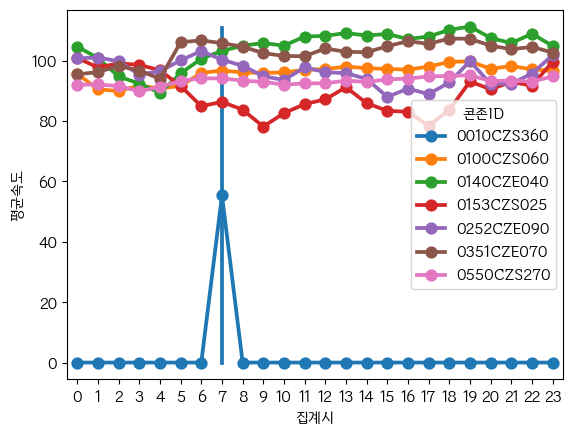

In [24]:
sns.pointplot(x='집계시', y='평균속도', hue='콘존ID', data=selectedVel)
plt.show()

In [26]:
# remove the zone '0010CZS360' from the selected list and do it over again
del selectedZone[4]

In [27]:
mask = []
for x in vel01['콘존ID'].values:
    if x in selectedZone:
        mask.append(True)
    else:
        mask.append(False)

In [28]:
selectedVel = vel01[mask]
selectedVel

,집계일자,집계시,콘존ID,차로유형구분코드,평균속도
174,2024-06-01,0,0100CZS060,1,95.71
287,2024-06-01,0,0140CZE040,1,104.70
390,2024-06-01,0,0153CZS025,1,100.92
545,2024-06-01,0,0252CZE090,1,100.78
669,2024-06-01,0,0351CZE070,1,95.49
...,...,...,...,...,...
35093,2024-06-01,23,0140CZE040,1,104.89
35196,2024-06-01,23,0153CZS025,1,99.67
35351,2024-06-01,23,0252CZE090,1,101.85
35475,2024-06-01,23,0351CZE070,1,102.71


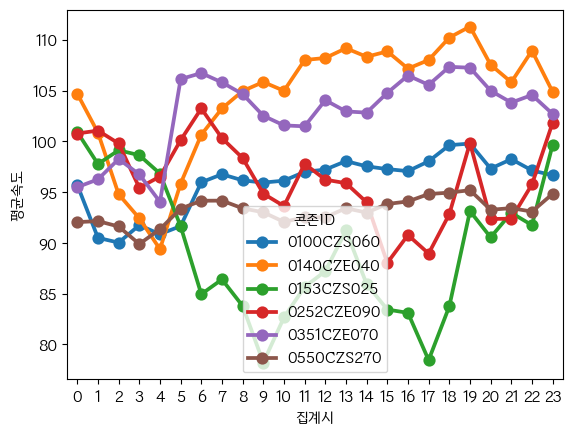

In [29]:
sns.pointplot(x='집계시', y='평균속도', hue='콘존ID', data=selectedVel)
plt.show()